In [45]:
# Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress
import numpy as np

In [46]:
# Store filepath in a variable
cumulative_data = "cumulative-co-emissions.csv"

In [47]:
# Read our data file with the Pandas library
cumulative_data_df = pd.read_csv(cumulative_data)

In [55]:
# Test print your data set
cumulative_data_df.YR = pd.to_numeric(cumulative_data_df.YR, errors='coerce')
cumulative_data_df.head()

,YR,CO2,Temp
0,1905.0,1.668692e+11,31.9
1,1906.0,1.744755e+11,27.3
2,1907.0,1.830220e+11,27.2
3,1908.0,1.912235e+11,23.9
4,1909.0,1.997697e+11,25.0


In [58]:
cumulative_data_df.dropna(inplace = True)

In [53]:
type(cumulative_data_df.YR[0])
# cumulative_data_df.Temp

numpy.float64

In [59]:
X = cumulative_data_df.CO2
Y = cumulative_data_df.Temp

results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

C:\Users\19143\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     18.31
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           4.03e-05
Time:                        14:38:29   Log-Likelihood:                -267.88
No. Observations:                 112   AIC:                             539.8
Df Residuals:                     110   BIC:                             545.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.9609      0.387     67.021      0.000      25.193      26.729
CO2         8.756e-13   2.05e-13      4.279      0.000     4.7e-13    1.28e-12
==============================================================================
Omnibus:                       62.228   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.371
Skew:                          -1.771   Prob(JB):                     3.71e-76
Kurtosis:                      10.867   Cond. No.                     2.91e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# ALL YEARS: Check the correlation between CO2 and Temp variables for ALL years (1905 to 2016).
corr_all = cumulative_data_df[['CO2', 'Temp']].corr()
corr_all.style.background_gradient(cmap='coolwarm')

,CO2,Temp
CO2,1,0.377743
Temp,0.377743,1


In [61]:
# FIRST TIME PERIOD: Create data set for the first time period: 1905 to 1950.
df_emissions_1905_1950 = cumulative_data_df[cumulative_data_df.YR < 1951]
df_emissions_1905_1950.head()

,YR,CO2,Temp
0,1905.0,1.668692e+11,31.9
1,1906.0,1.744755e+11,27.3
2,1907.0,1.830220e+11,27.2
3,1908.0,1.912235e+11,23.9
4,1909.0,1.997697e+11,25.0


In [62]:
# FIRST TIME PERIOD: Check the correlation between CO2 and Temp variables for first time period: 1905 to 1950.
corr_1905_1950 = df_emissions_1905_1950[['CO2', 'Temp']].corr()
corr_1905_1950.style.background_gradient(cmap='coolwarm')

,CO2,Temp
CO2,1,-0.00953063
Temp,-0.00953063,1


In [63]:
# SECOND TIME PERIOD: Create data set for the second time period: 1950 to 2016.
df_emissions_1951_2016 = cumulative_data_df[cumulative_data_df.YR >= 1951]
df_emissions_1951_2016.head()

,YR,CO2,Temp
46,1951.0,6.962909e+11,30.2
47,1952.0,7.146129e+11,26.4
48,1953.0,7.334089e+11,28.7
49,1954.0,7.524743e+11,31.3
50,1955.0,7.733278e+11,28.1


In [64]:
# SECOND TIME PERIOD: Check the correlation between CO2 and Temp variables for first time period: 1950 to 2016.
corr_1950_2016 = df_emissions_1951_2016[['CO2', 'Temp']].corr()
corr_1950_2016.style.background_gradient(cmap='coolwarm')

,CO2,Temp
CO2,1,0.174716
Temp,0.174716,1


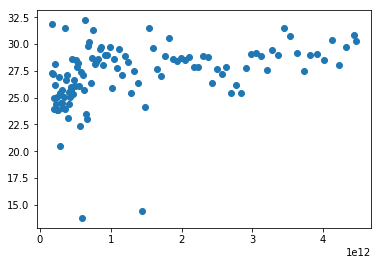

In [65]:
plt.scatter(X,Y)

# 


plt.show()

In [66]:
# Find the line equation, or line of best fit, for y = CO2 variable (x = years)

# Set data
x_axis = np.arange(1900, 1955, 10)
y_axis_co2 = np.arange(166869189480, 4467353508840, 1000000000000)

# Set line
(slope, intercept) = linregress(x_axis, y_axis_co2)
fit = slope * x_axis + intercept

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [67]:
# Repeat for y = temperature variable (x = years)

In [68]:
# Clean data by removing row with grand total using dropna method. Print clean data set to test results.
#clean_cumulative_data_df = cumulative_data_df.dropna()
#clean_cumulative_data_df.head()